In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [83]:
thickness = np.array([6.8,6.9,7,7.1,7.2,7.3,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,9,9.5,10,10.5,11,11.5,12])
conductivities = np.array([265.833826,385.7487136,2604.55289,4409.948758,10921.54655,28455.23483,69184.21053,208193.4423,254429.239,312497.7106,318725.4784,318356.2226,335227.9939,365347.3533,371496.1423,386801.3937,403764.7059,462033.3015,509885.3664,546978.8551,572884.4221,592157.0856,608776.6351,619750.558])
cond_scaled = conductivities / 1e5

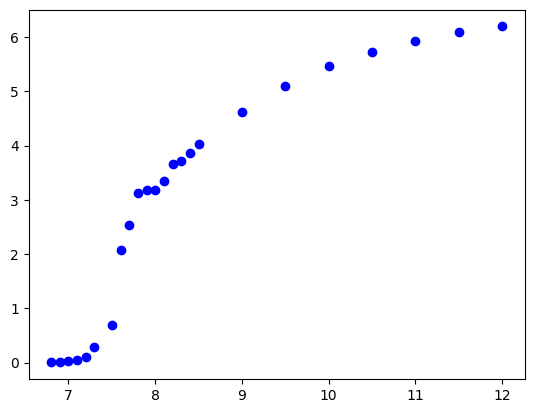

In [84]:
plt.scatter(thickness, cond_scaled, color='blue')

In [85]:
# Fit function
def f(x,sigma,t_0,a):
    f_vals = np.empty(len(x))
    f_vals[x < t_0] = 0
    f_vals[x >= t_0] = sigma * (x[x >= t_0]/t_0 - 1)**(a)

    return f_vals

popt, pcov = curve_fit(f, thickness, cond_scaled, p0=[10,7,1])

Text(0.5, 0, 'Thickness [nm]')

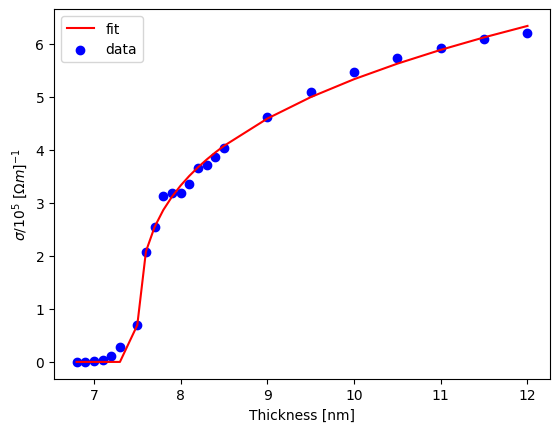

In [88]:
plt.plot(thickness, f(thickness, *popt),color='red',label='fit')
plt.scatter(thickness, cond_scaled, color='blue',label='data')
plt.legend()
plt.ylabel(r'$\sigma/10^5$ $[\Omega m]^{-1}$')
plt.xlabel('Thickness [nm]')

In [87]:
print(*popt)

7.364202589671037 7.497573466619757 0.2939544501850308


In [112]:
np.sum(film)

np.float64(1500.0)

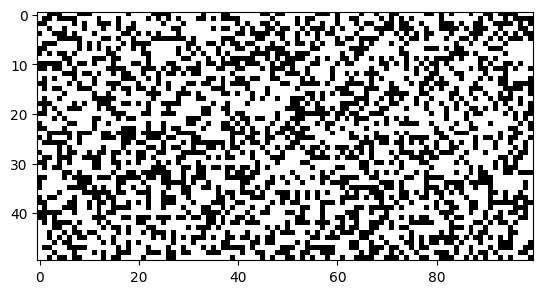

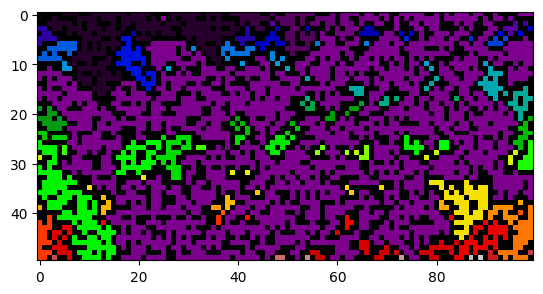

In [161]:
# Simple percolation model - testing
w=50
l=100
film = np.zeros(shape=(w,l))
while np.sum(film) / film.size < 0.6:
    x = np.random.randint(0,w)
    y = np.random.randint(0,l)
    film[x,y] = 1

plt.imshow(film, cmap='gray')
plt.show()

from scipy.ndimage import label
import scipy.stats as stats
labeled_array, num_features = label(film)
plt.imshow(labeled_array, cmap='nipy_spectral')

In [172]:
# Percolation monte carlo

def percolate(w,l):
    w = 30
    l = int(8.25*w)
    film = np.zeros(shape=(w,l)) # Start at half filling to save time
    percolated = False
    while percolated == False:
        x = np.random.randint(0,w)
        y = np.random.randint(0,l)
        film[x,y] = 1

        labeled_array, num_features = label(film)

        # Check for percolation - if any label appears on left and right edge at any point, percolation has occurred
        left_edge_labels = set(labeled_array[:,0])
        right_edge_labels = set(labeled_array[:,l-1])
        left_edge_labels.discard(0)  # Remove background
        right_edge_labels.discard(0)  # Remove background
        if len(left_edge_labels.intersection(right_edge_labels)) > 0:
            percolated = True

    filling_frac = np.sum(film) / film.size

    return filling_frac


# Monte Carlo
num_trials = 100
filling_fracs = np.empty(num_trials)
for i in range(num_trials):
    filling_fracs[i] = percolate(50,100)

In [173]:
np.unique(labeled_array)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158], dtype=int32)

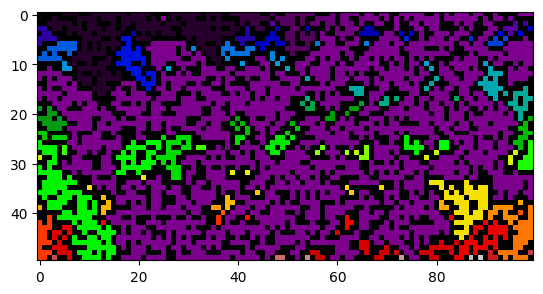

In [177]:
plt.imshow(labeled_array, cmap='nipy_spectral')

[0.6465587  0.68906883 0.63846154 0.65775978 0.65870445 0.6488529
 0.62712551 0.64912281 0.61983806 0.66248313 0.63778677 0.6611336
 0.648583   0.62712551 0.65195682 0.65937922 0.63319838 0.65249663
 0.69541161 0.67395412 0.63981107 0.63184885 0.65775978 0.64817814
 0.65438596 0.66653171 0.64156545 0.65006748 0.66437247 0.68448043
 0.65708502 0.66099865 0.63994602 0.66518219 0.6585695  0.6465587
 0.66545209 0.64048583 0.67624831 0.64008097 0.63751687 0.64210526
 0.66734143 0.68663968 0.65775978 0.64534413 0.64925776 0.66194332
 0.68394062 0.69190283 0.67881242 0.65276653 0.64183536 0.64318489
 0.61659919 0.69635628 0.62672065 0.6802969  0.66302294 0.66923077
 0.62887989 0.67611336 0.66369771 0.63117409 0.64278003 0.65748988
 0.66234818 0.62834008 0.64696356 0.65762483 0.69041835 0.61565452
 0.63576248 0.6757085  0.66315789 0.65006748 0.63954116 0.64278003
 0.63414305 0.62523617 0.66531714 0.62645074 0.6534413  0.67503374
 0.6268556  0.61646424 0.67192982 0.69460189 0.63792173 0.6790823

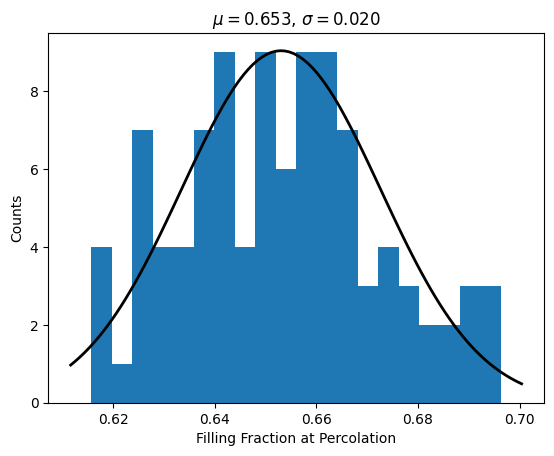

In [176]:
print(filling_fracs)
plt.hist(filling_fracs, bins=20)
mu, sigma = stats.norm.fit(filling_fracs)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p * num_trials * (xmax - xmin) / 20, 'k', linewidth=2)
plt.xlabel('Filling Fraction at Percolation')
plt.ylabel('Counts')
plt.title(r'$\mu=%.3f$, $\sigma=%.3f$' % (mu, sigma))
plt.show()
